In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [14]:
# Load the dataset
df = pd.read_csv('train.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21152 entries, 0 to 21151
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Speed                      21152 non-null  float64
 1   Vertical_Acceleration      21152 non-null  float64
 2   Lateral_Acceleration       21152 non-null  float64
 3   Longitudinal_Acceleration  21152 non-null  float64
 4   Roll                       21152 non-null  float64
 5   Pitch                      21152 non-null  float64
 6   Yaw                        21152 non-null  float64
 7   Status                     21152 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


In [15]:
# Split data into features and target variable
X = df.drop('Status', axis=1)
y = df['Status']


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=42)


In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Evaluate the model
y_pred = rf_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.89      1.00      0.94         8

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10



In [20]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
# Assuming y_test and y_pred are already defined
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

In [22]:
# Convert support to integer (it's float by default)
df_report['support'] = df_report['support'].astype(int)





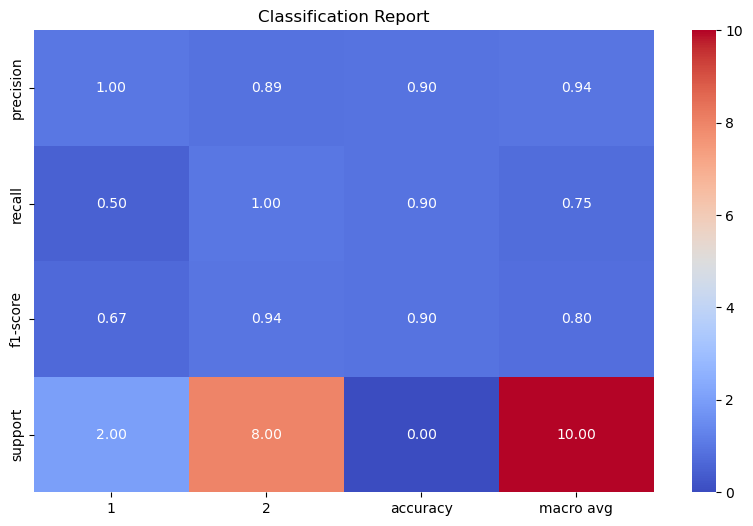

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.show()

In [24]:

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt




In [25]:
# Generate classification report
y_pred = rf_classifier.predict(X_test_scaled)
report = classification_report(y_test, y_pred, output_dict=True)

In [26]:
# Extract relevant metrics
precision = []
recall = []
f1_score = []
support = []


In [27]:
for key, value in report.items():
    if key.isdigit():  # Assuming class labels are numeric
        precision.append(value['precision'])
        recall.append(value['recall'])
        f1_score.append(value['f1-score'])
        support.append(value['support'])


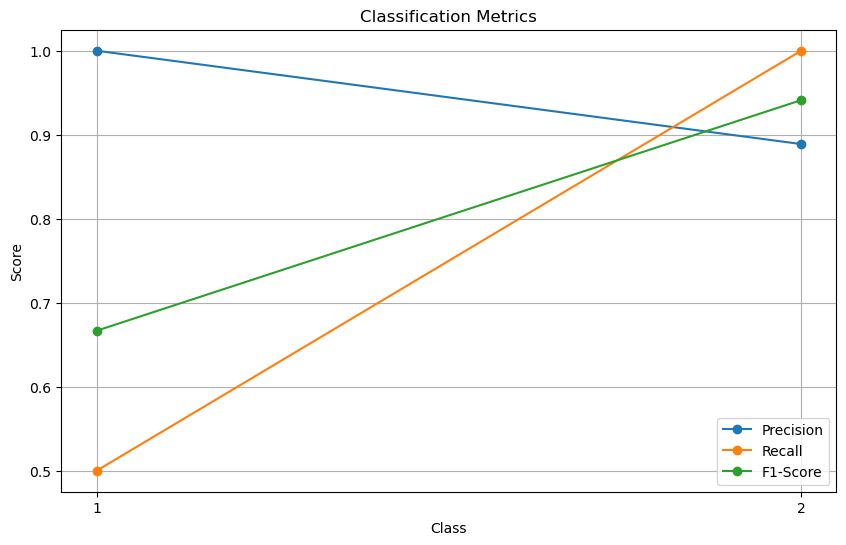

In [28]:
# Plot the metrics
classes = [int(label) for label in report.keys() if label.isdigit()]  # Extract class labels
plt.figure(figsize=(10, 6))

plt.plot(classes, precision, label='Precision', marker='o')
plt.plot(classes, recall, label='Recall', marker='o')
plt.plot(classes, f1_score, label='F1-Score', marker='o')

plt.title('Classification Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(classes)
plt.legend()
plt.grid(True)


In [29]:
# Evaluate the model
y_pred = rf_classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.89      1.00      0.94         8

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10

